## Greedy heuristics

Students:
- Patrick Molina 157419
- ChihabEddine Zitouni 158763

### Problem Description

The task is to select a subset of nodes and form an optimal Hamiltonian cycle minimizing the total cost and travel distance. Each node is defined by three attributes: **x-coordinate**, **y-coordinate**, and **cost**. Exactly **50% of the nodes** must be selected (rounded up if the total number is odd). The goal is to minimize the sum of the **cycle length** and the **total cost** of the selected nodes.

Distances between nodes are computed using the **Euclidean distance**, rounded to the nearest integer. A **distance matrix** is precomputed after reading each instance and used throughout the optimization process, allowing instances to be represented solely by distance values.

### Methods
#### Greedy Heuristics
Four constructive heuristics are implemented and adapted to this problem:
1. **Random Solution** – Generates a feasible cycle by randomly selecting nodes.
2. **Nearest Neighbor (End Insertion)** – Adds the next node giving the best improvement when inserted only at the **end** of the path.
3. **Nearest Neighbor (Flexible Insertion)** – Adds the next node at any position (beginning, end, or inside) that best improves the objective function.
4. **Greedy Cycle** – Builds the cycle by repeatedly inserting nodes that minimize the total increase in distance and cost.

Here, “nearest” is understood as the **best improvement in the objective value**, not just geometric closeness.
For each heuristic, **200 solutions** are generated from each starting node, and **200 random solutions** are also produced for comparison.

## Pseudocode

## Results

In [74]:
import pandas as pd
import numpy as np
import os
tspa_df = pd.read_csv("../../raw_data/TSPA.csv",  header=None)
tspb_df = pd.read_csv("../../raw_data/TSPB.csv",  header=None)

### Instance A

In [76]:
experiment_summary_a = pd.read_csv("../Results/TSPA/experiment_summary.csv")

In [77]:
experiment_summary_a

,Instance,Method,MinCost,MaxCost,AvgCost,NumSolutions,BestSolutionID
0,TSPA,RandomSolution,241951,285038,265448.14,100,54
1,TSPA,NearestNeighborEndOnly,90463,119293,104558.40,100,54
2,TSPA,NearestNeighborAllPositions,71719,74252,72697.30,100,85
3,TSPA,GreedyCycle,71488,74252,72523.63,100,57


In [78]:
def load_solution(instance_name,method, solution_id):
    file_path = f"../Results/{instance_name}/{instance_name}_{method}_solutions.csv"
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        return df[df['SolutionID'] == solution_id]
    else:
        print(f"File {file_path} does not exist.")
        return None

In [79]:
solutions_A = pd.DataFrame()
for method in experiment_summary_a['Method'].unique():
    method_data = experiment_summary_a[experiment_summary_a['Method'] == method]
    best_solution_id = method_data['BestSolutionID'].iloc[0]
    print(f"{method}: Best Solution ID = {best_solution_id}")
    solution = load_solution("TSPA", method, best_solution_id)
    solutions_A = pd.concat([solutions_A, solution], ignore_index=True)

solutions_A

RandomSolution: Best Solution ID = 54
NearestNeighborEndOnly: Best Solution ID = 54
NearestNeighborAllPositions: Best Solution ID = 85
GreedyCycle: Best Solution ID = 57


,SolutionID,TotalCost,NumNodes,TotalDistance,ObjectiveFunction,Cycle
0,54,241951,100,142332,384283,153-70-49-113-16-144-51-71-81-142-68-72-189-18...
1,54,90463,100,33023,123486,130-94-63-176-80-79-53-180-154-135-133-151-59-...
2,85,71719,100,24005,95724,0-46-68-139-193-41-115-5-42-181-159-69-108-18-...
3,57,71488,100,23578,95066,143-183-89-186-23-137-176-80-79-63-94-124-152-...


In [ ]:
import matplotlib.pyplot as plt

# Parse the coordinates from tspa_df
coords = tspa_df.iloc[:, 0].str.split(';', expand=True)
x_coords = coords[0].astype(int)
y_coords = coords[1].astype(int)
costs = coords[2].astype(int)



In [ ]:
def plot_solution(instance, method, solution_data):
    """
    Plot a TSP solution showing the cycle and nodes.
    
    Parameters:
    instance: str - 'TSPA' or 'TSPB'
    method: str - Method name or 'Checker'
    solution_data: dict or pandas.Series - Solution data containing cycle information
    """
    # Select the appropriate dataset and coordinates
    if instance == 'TSPA':
        df = tspa_df
    else:  # TSPB
        df = tspb_df
    
    # Parse coordinates
    coords = df.iloc[:, 0].str.split(';', expand=True)
    x_coords = coords[0].astype(int)
    y_coords = coords[1].astype(int)
    costs = coords[2].astype(int)
    
    # Extract cycle information
    if isinstance(solution_data, dict):
        cycle_str = solution_data['Cycle']
        objective = solution_data['ObjectiveFunction']
        total_cost = solution_data['TotalCost']
        total_distance = solution_data['TotalDistance']
    else:  # pandas Series
        cycle_str = solution_data['Cycle']
        objective = solution_data['ObjectiveFunction']
        total_cost = solution_data['TotalCost']
        total_distance = solution_data['TotalDistance']
    
    cycle_nodes = [int(x) for x in cycle_str.split('-')]
    
    # Get coordinates for selected nodes
    highlight_x = x_coords[cycle_nodes]
    highlight_y = y_coords[cycle_nodes]
    
    # Create the plot
    plt.figure(figsize=(14, 10))
    
    # Plot unselected nodes in light gray
    unselected_mask = ~x_coords.index.isin(cycle_nodes)
    plt.scatter(x_coords[unselected_mask], y_coords[unselected_mask], 
               alpha=0.5, s=20, color='lightgray', label='Unselected nodes')
    
    # Plot selected nodes with color based on cost (green scale) and thin black border
    selected_costs = costs[cycle_nodes]
    scatter = plt.scatter(highlight_x, highlight_y, 
                         c=selected_costs, cmap='Greens', 
                         alpha=0.9, s=50, label='Selected nodes (100)',
                         edgecolors='black', linewidths=0.5)
    
    # Draw the cycle edges
    for j in range(len(cycle_nodes)):
        current_node = cycle_nodes[j]
        next_node = cycle_nodes[(j + 1) % len(cycle_nodes)]  # Wrap around to close the cycle
        
        plt.plot([x_coords[current_node], x_coords[next_node]], 
                 [y_coords[current_node], y_coords[next_node]], 
                 'b-', alpha=0.4, linewidth=0.8)
    
    # Add colorbar to show cost scale
    plt.colorbar(scatter, label='Node Cost')
    
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'{instance} Dataset - {method} Solution\n'
              f'Objective: {objective}, '
              f'Cost: {total_cost}, '
              f'Distance: {total_distance}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()



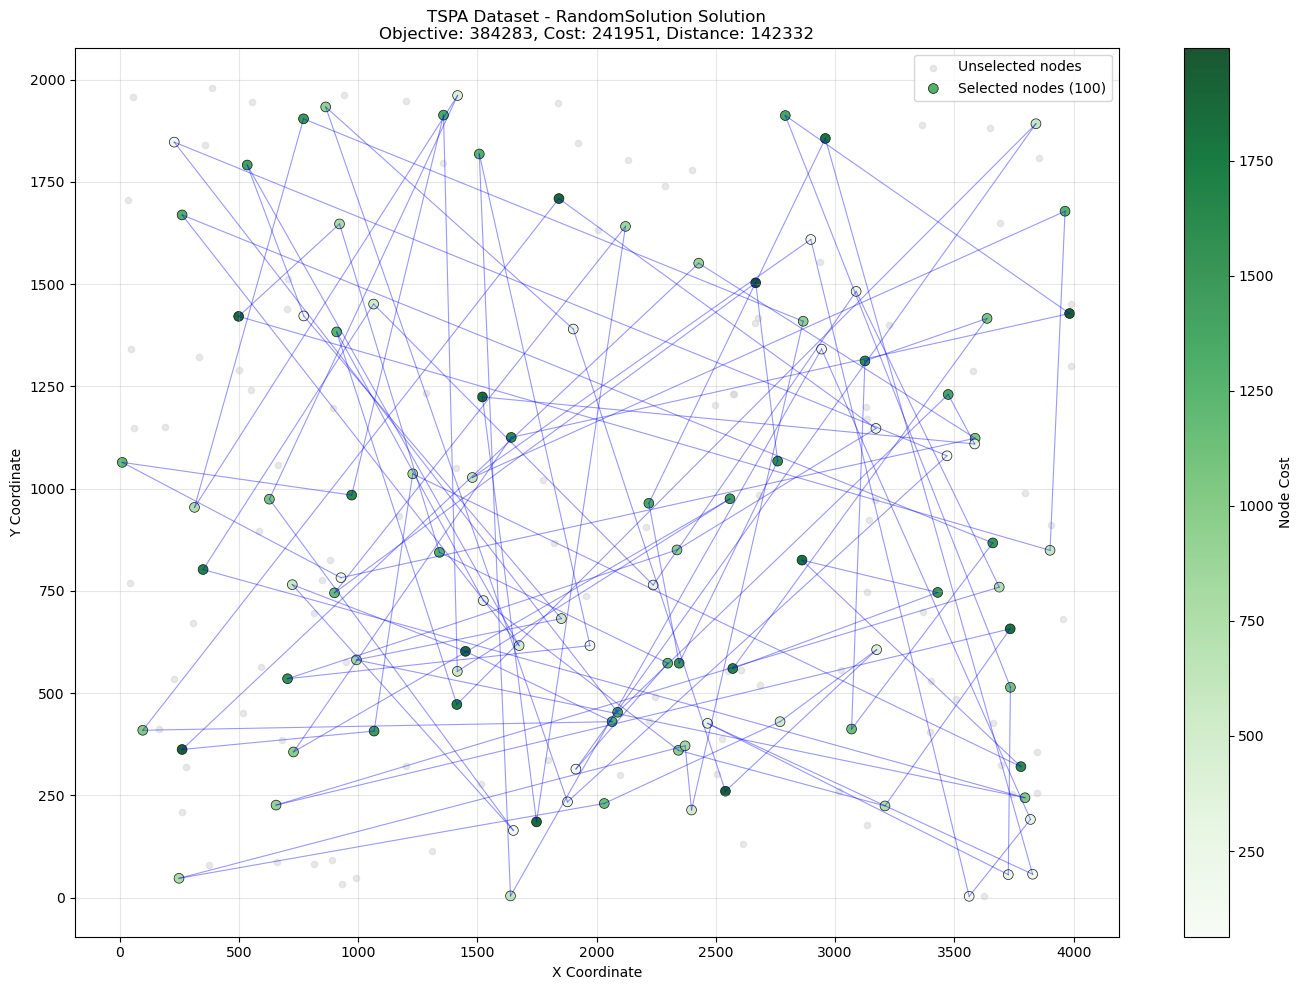

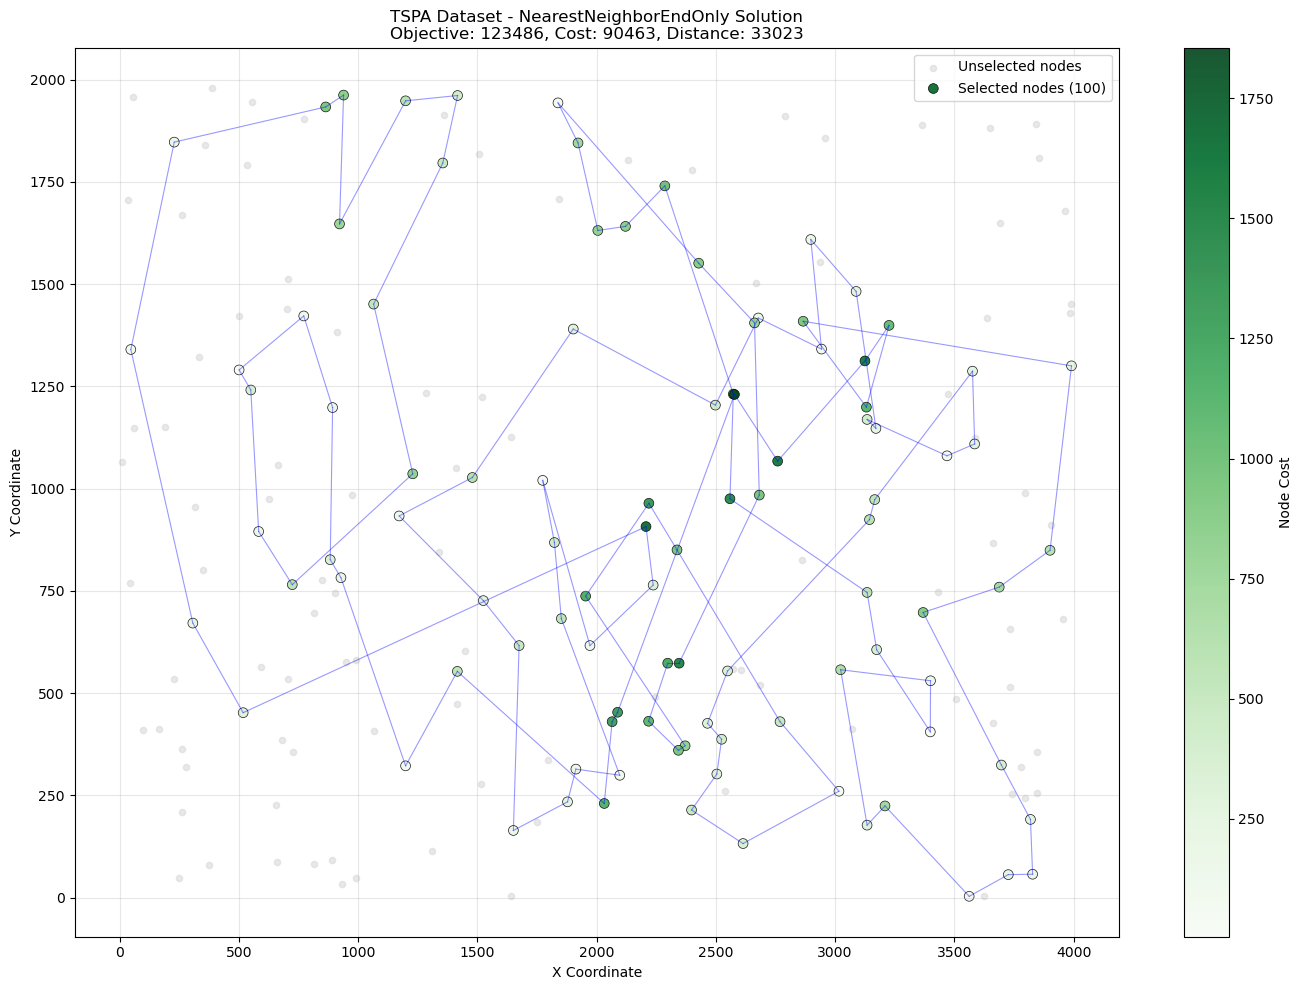

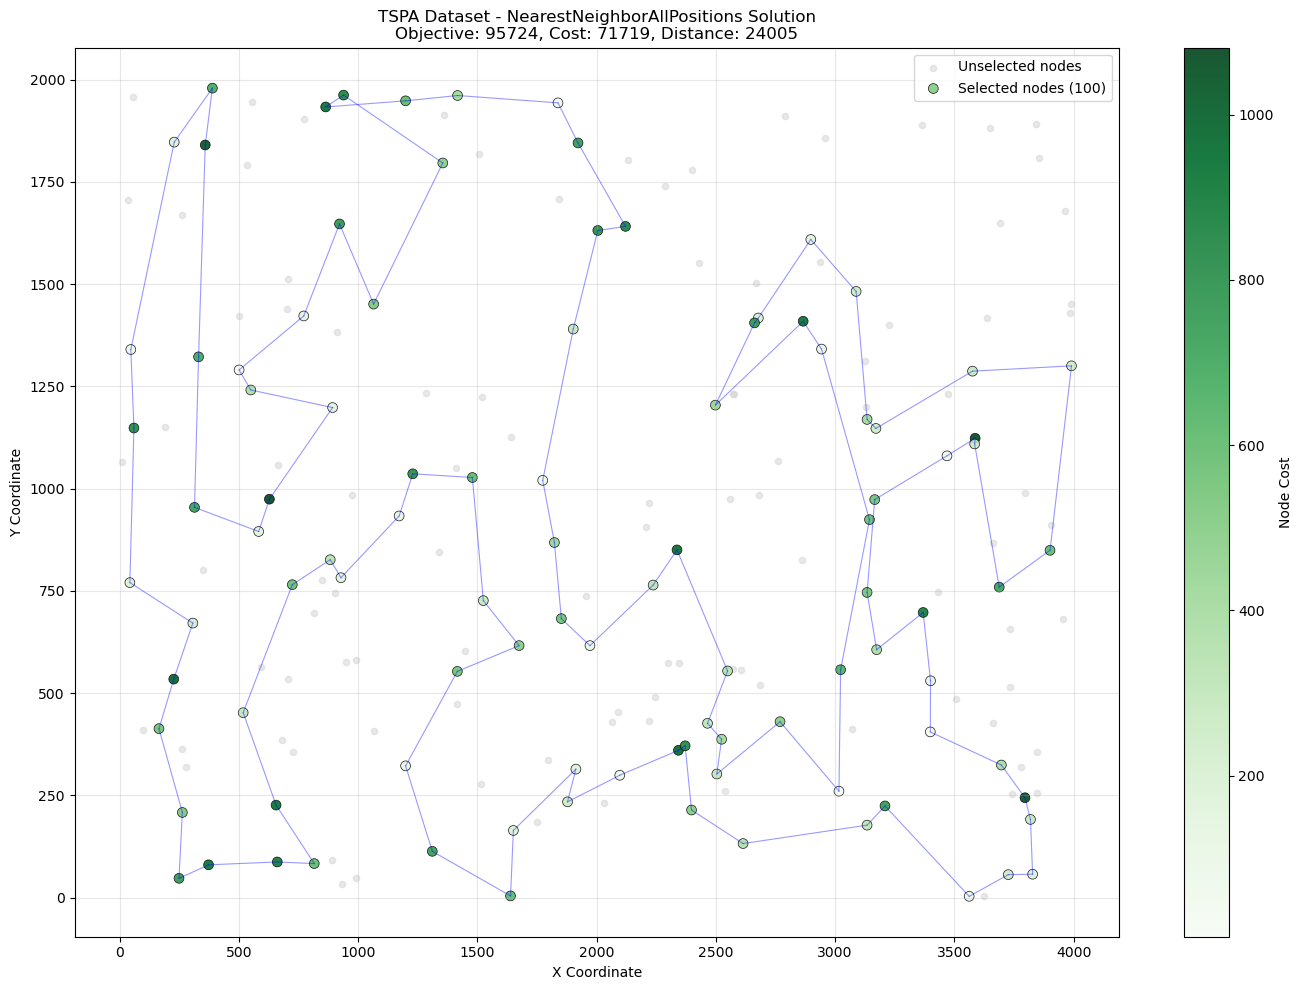

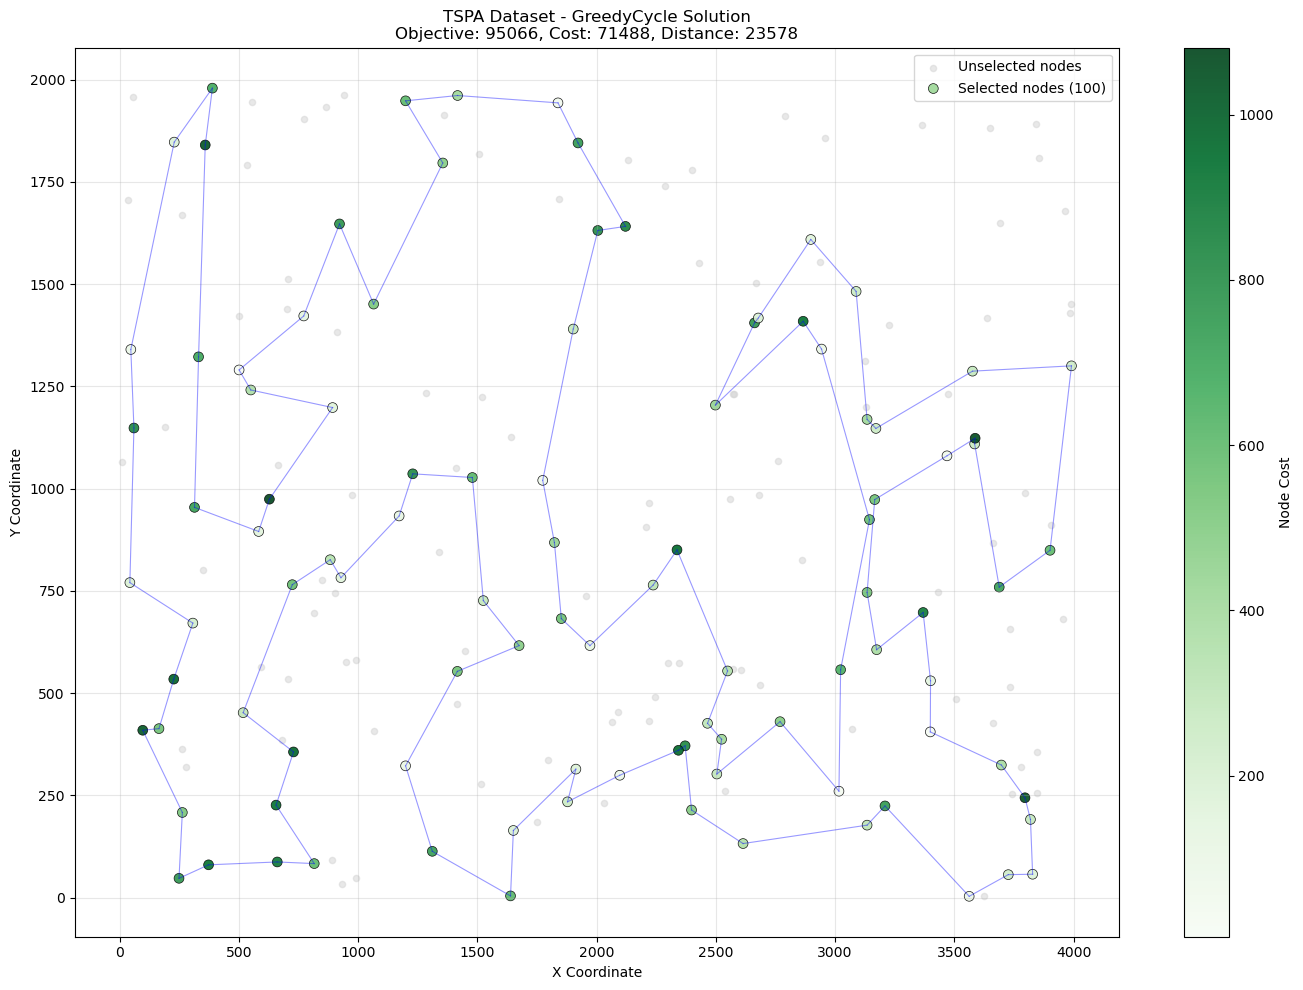

In [104]:
methods = ['RandomSolution', 'NearestNeighborEndOnly', 'NearestNeighborAllPositions', 'GreedyCycle']
for i, method in enumerate(methods):
    best_solution = solutions_A[solutions_A.index == i].iloc[0]
    plot_solution('TSPA', method, best_solution)

### Instance B

In [88]:
experiment_summary_b = pd.read_csv("../Results/TSPB/experiment_summary.csv")

In [89]:
experiment_summary_b

,Instance,Method,MinCost,MaxCost,AvgCost,NumSolutions,BestSolutionID
0,TSPB,RandomSolution,189942,238289,213473.69,100,48
1,TSPB,NearestNeighborEndOnly,62606,76294,69564.98,100,26
2,TSPB,NearestNeighborAllPositions,49001,57140,51265.72,100,2
3,TSPB,GreedyCycle,49394,57324,51533.05,100,43


In [90]:
solutions_B = pd.DataFrame()
for method in experiment_summary_a['Method'].unique():
    method_data = experiment_summary_a[experiment_summary_a['Method'] == method]
    best_solution_id = method_data['BestSolutionID'].iloc[0]
    print(f"{method}: Best Solution ID = {best_solution_id}")
    solution = load_solution("TSPB", method, best_solution_id)
    solutions_B = pd.concat([solutions_B, solution], ignore_index=True)

solutions_B

RandomSolution: Best Solution ID = 54
NearestNeighborEndOnly: Best Solution ID = 54
NearestNeighborAllPositions: Best Solution ID = 85
GreedyCycle: Best Solution ID = 57


,SolutionID,TotalCost,NumNodes,TotalDistance,ObjectiveFunction,Cycle
0,54,202441,100,153260,355701,173-37-180-159-150-182-196-133-119-41-142-194-...
1,54,68291,100,28113,96404,0-29-109-35-33-160-8-111-144-104-138-11-168-19...
2,85,50549,100,21194,71743,54-73-164-31-136-45-5-177-25-104-138-182-139-1...
3,57,51109,100,19505,70614,165-163-187-146-97-141-91-36-61-175-78-142-45-...


In [91]:
import matplotlib.pyplot as plt

# Parse the coordinates from tspb_df
coords = tspb_df.iloc[:, 0].str.split(';', expand=True)
x_coords = coords[0].astype(int)
y_coords = coords[1].astype(int)
costs = coords[2].astype(int)



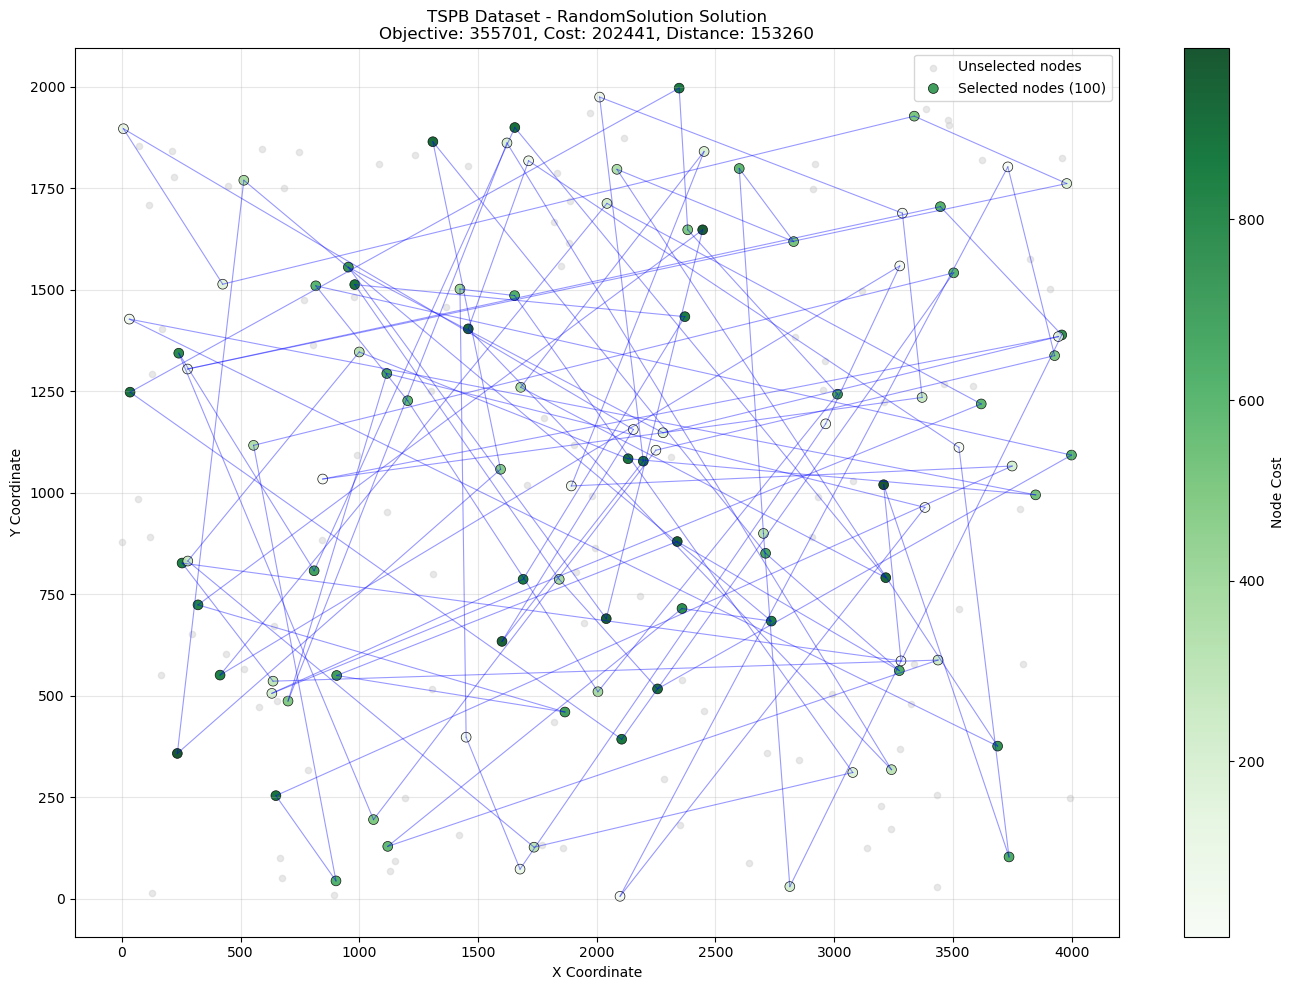

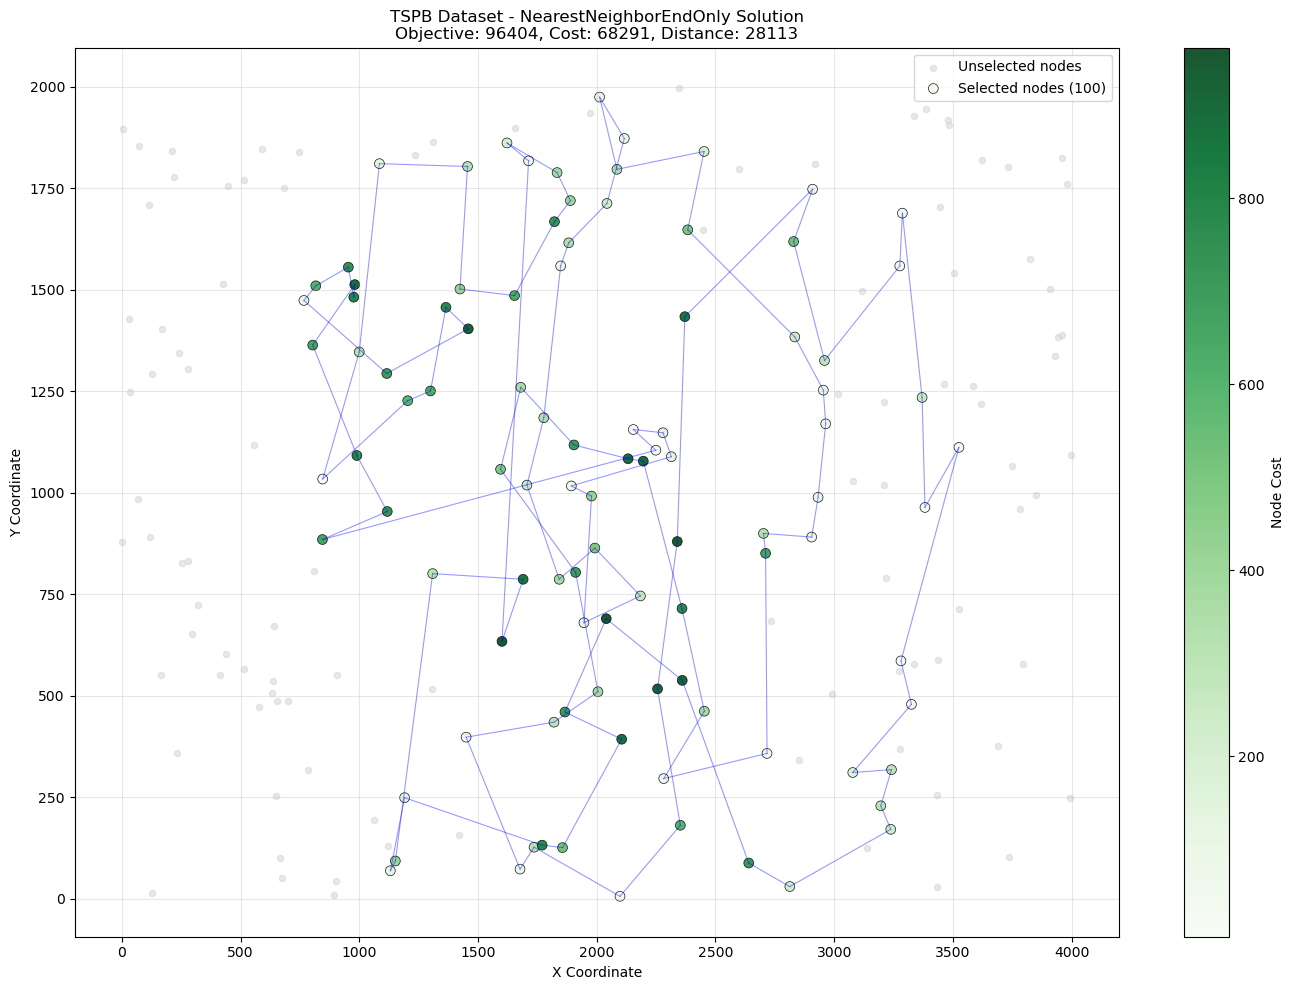

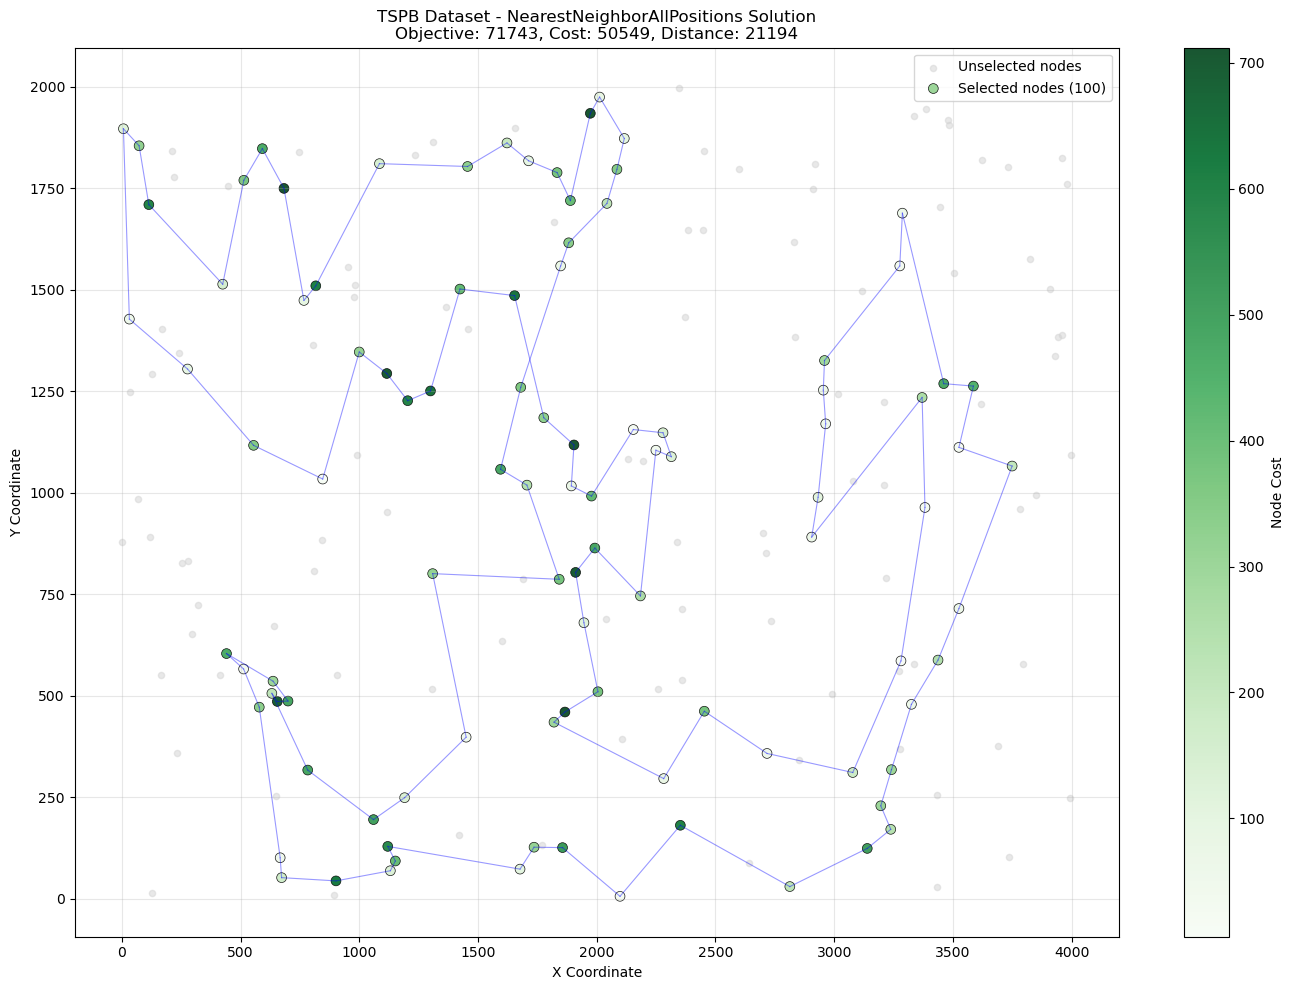

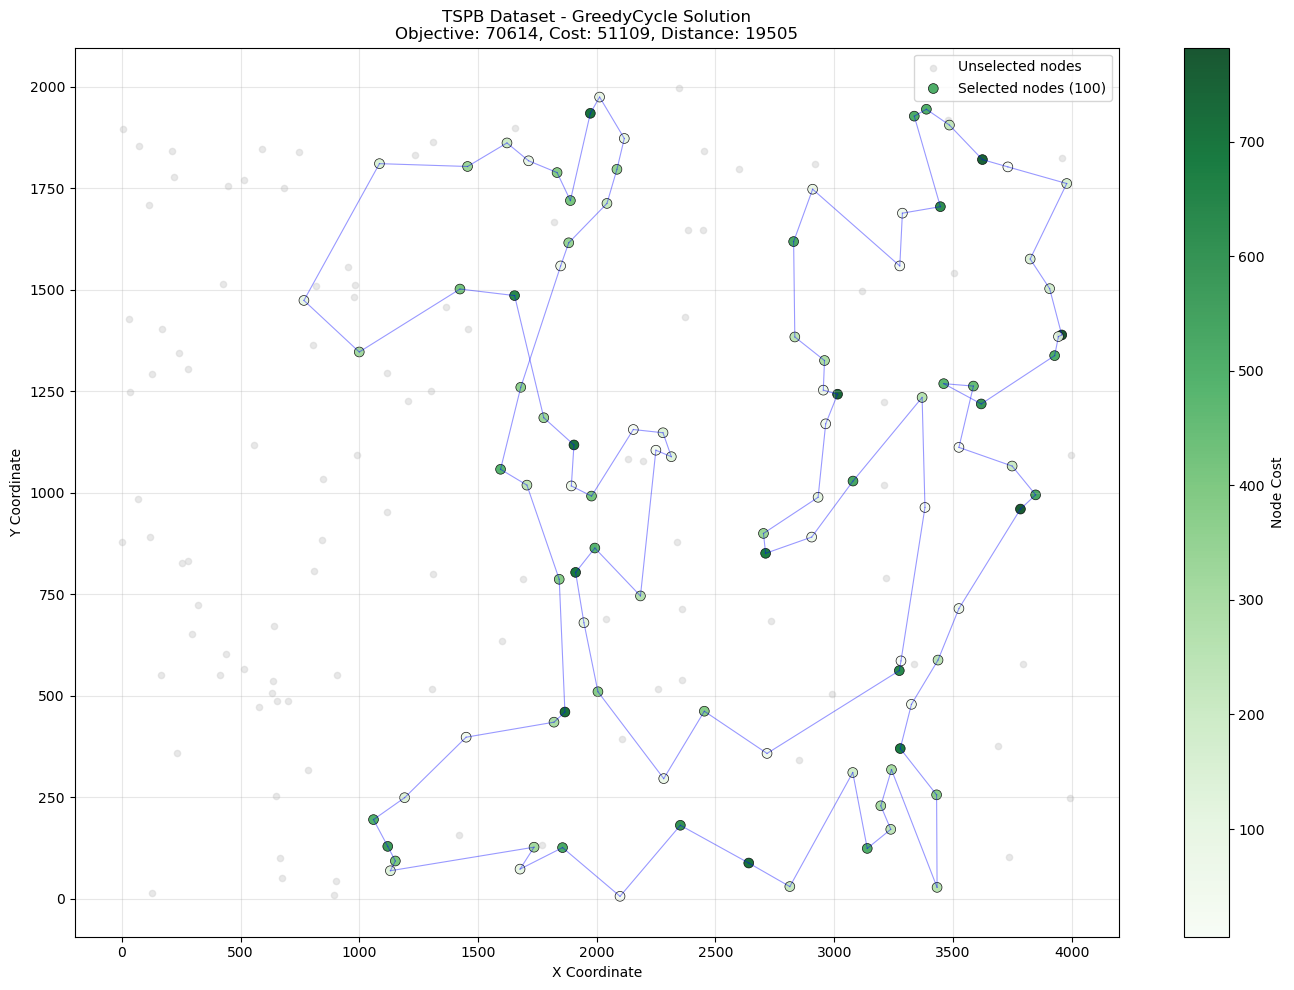

In [ ]:
for i, method in enumerate(methods):
    best_solution = solutions_B[solutions_B.index == i].iloc[0]
    plot_solution('TSPB', method, best_solution)

## Solution Checker

In [108]:
# Read the solution checker Excel file with multiple sheets
solution_checker_a = pd.read_excel("../Results/Solution checker.xlsx", sheet_name="TSPA")
solution_checker_b = pd.read_excel("../Results/Solution checker.xlsx", sheet_name="TSPB")

print("Solution Checker for TSPA:")
print(solution_checker_a)
print("\nSolution Checker for TSPB:")
print(solution_checker_b)

Solution Checker for TSPA:
     Node id       x       y    cost  Unnamed: 4  List of nodes     x.1  \
0        NaN     NaN     NaN     NaN         NaN            NaN     NaN   
1        0.0  1355.0  1796.0   496.0         NaN           31.0  3697.0   
2        1.0  2524.0   387.0   414.0         NaN          111.0  2559.0   
3        2.0  2769.0   430.0   500.0         NaN           14.0  3088.0   
4        3.0  3131.0  1199.0  1133.0         NaN           80.0  1823.0   
..       ...     ...     ...     ...         ...            ...     ...   
196    195.0   189.0  1151.0  1145.0         NaN            NaN     NaN   
197    196.0  3688.0   759.0   727.0         NaN            NaN     NaN   
198    197.0   973.0   984.0  1637.0         NaN            NaN     NaN   
199    198.0   910.0  1383.0  1255.0         NaN            NaN     NaN   
200    199.0   262.0  1669.0  1307.0         NaN            NaN     NaN   

        y.1   cost.1  Edge length  Objective function  
0       NaN  996

In [99]:
def extract_checker_solution(checker_df, instance_name):
    """Extract solution data from checker Excel file and format it like our solutions"""
    
    # Get the final values from first row
    total_cost = checker_df.loc[0, 'cost.1']
    total_distance = checker_df.loc[0, 'Edge length']
    objective_function = checker_df.loc[0, 'Objective function']
    
    # Extract the cycle nodes (excluding the first row which contains totals)
    cycle_nodes = []
    for idx in range(1, len(checker_df)):
        node_id = checker_df.loc[idx, 'List of nodes']
        if pd.notna(node_id):
            cycle_nodes.append(int(node_id))
    
    # Convert cycle to string format
    cycle_str = '-'.join(map(str, cycle_nodes))
    
    # Create solution dictionary
    checker_solution = {
        'Instance': instance_name,
        'Method': 'Checker',
        'TotalCost': int(total_cost),
        'TotalDistance': int(total_distance),
        'ObjectiveFunction': int(objective_function),
        'Cycle': cycle_str
    }
    
    return checker_solution

# Extract checker solutions for both instances
checker_solution_a = extract_checker_solution(solution_checker_a, 'TSPA')
checker_solution_b = extract_checker_solution(solution_checker_b, 'TSPB')

print("Checker Solution for TSPA:")
for key, value in checker_solution_a.items():
    print(f"{key}: {value}")

print("\nChecker Solution for TSPB:")
for key, value in checker_solution_b.items():
    print(f"{key}: {value}")

Checker Solution for TSPA:
Instance: TSPA
Method: Checker
TotalCost: 99670
TotalDistance: 165696
ObjectiveFunction: 265366
Cycle: 31-111-14-80-95-169-8-26-92-48-106-160-11-152-130-119-109-189-75-1-177-41-137-174-199-150-192-175-114-4-77-43-121-91-50-149-0-19-178-164-159-143-59-147-116-27-96-185-64-20-71-61-163-74-113-195-53-62-32-180-81-154-102-144-141-87-79-194-21-171-108-15-117-22-55-36-132-128-76-161-153-88-127-186-45-167-101-99-135-51-112-66-6-156-98-190-72-94-12-73-31

Checker Solution for TSPB:
Instance: TSPB
Method: Checker
TotalCost: 46383
TotalDistance: 162402
ObjectiveFunction: 208785
Cycle: 122-143-179-197-183-34-31-101-38-103-131-121-127-24-50-112-154-134-25-36-165-37-137-88-55-4-153-80-157-145-136-61-73-185-132-52-12-107-189-170-181-147-159-64-129-89-58-72-114-85-166-59-119-193-71-44-196-117-150-162-158-67-3-156-91-70-51-174-188-140-148-141-130-142-53-69-115-82-63-8-16-18-29-33-19-190-198-135-95-172-182-2-5-128-66-169-0-57-99-92-122


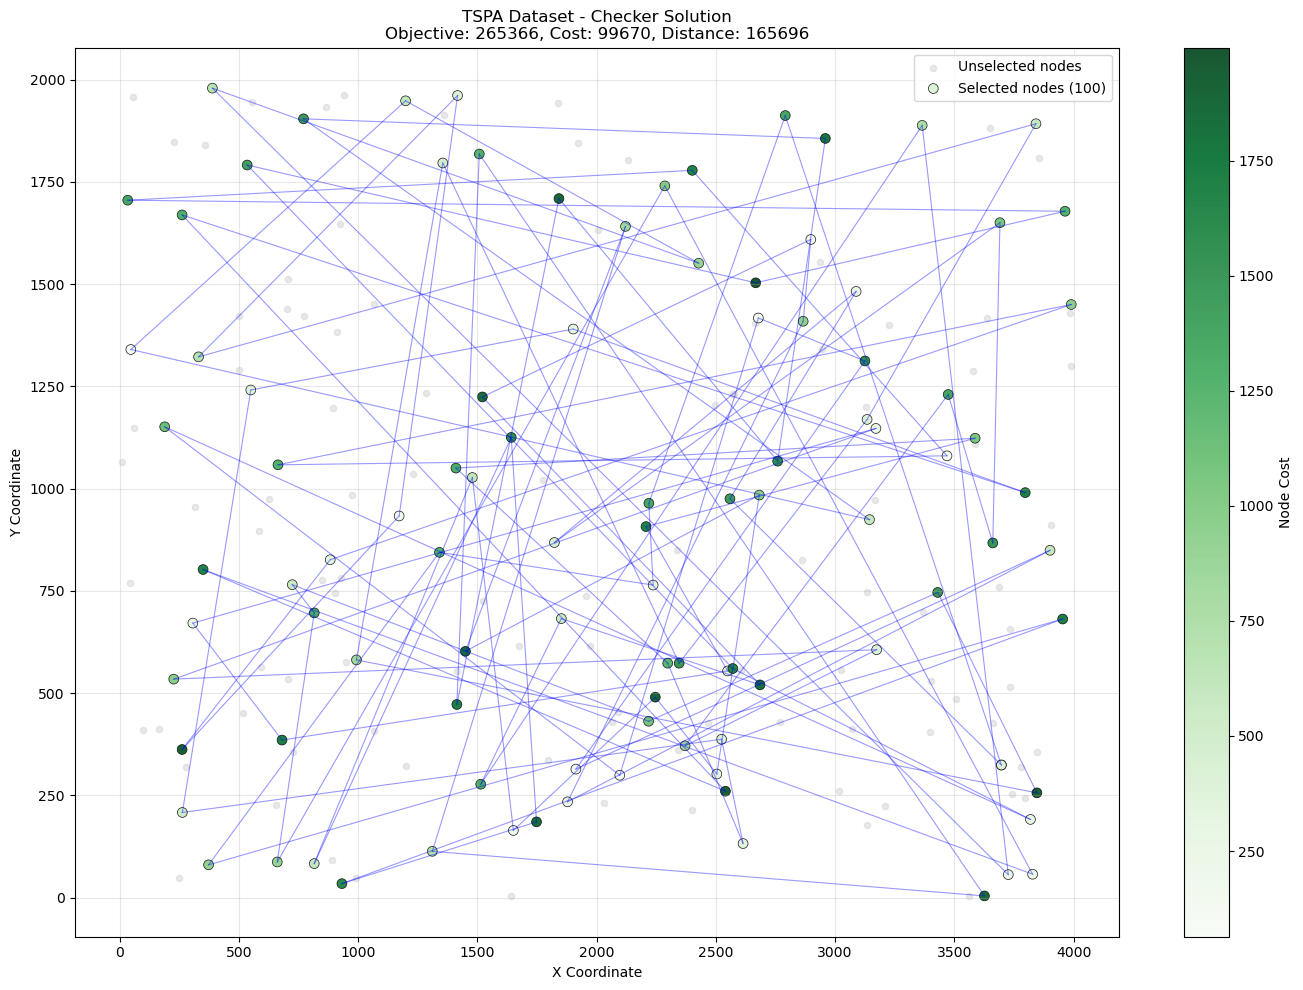

In [105]:
plot_solution('TSPA', 'Checker', checker_solution_a)

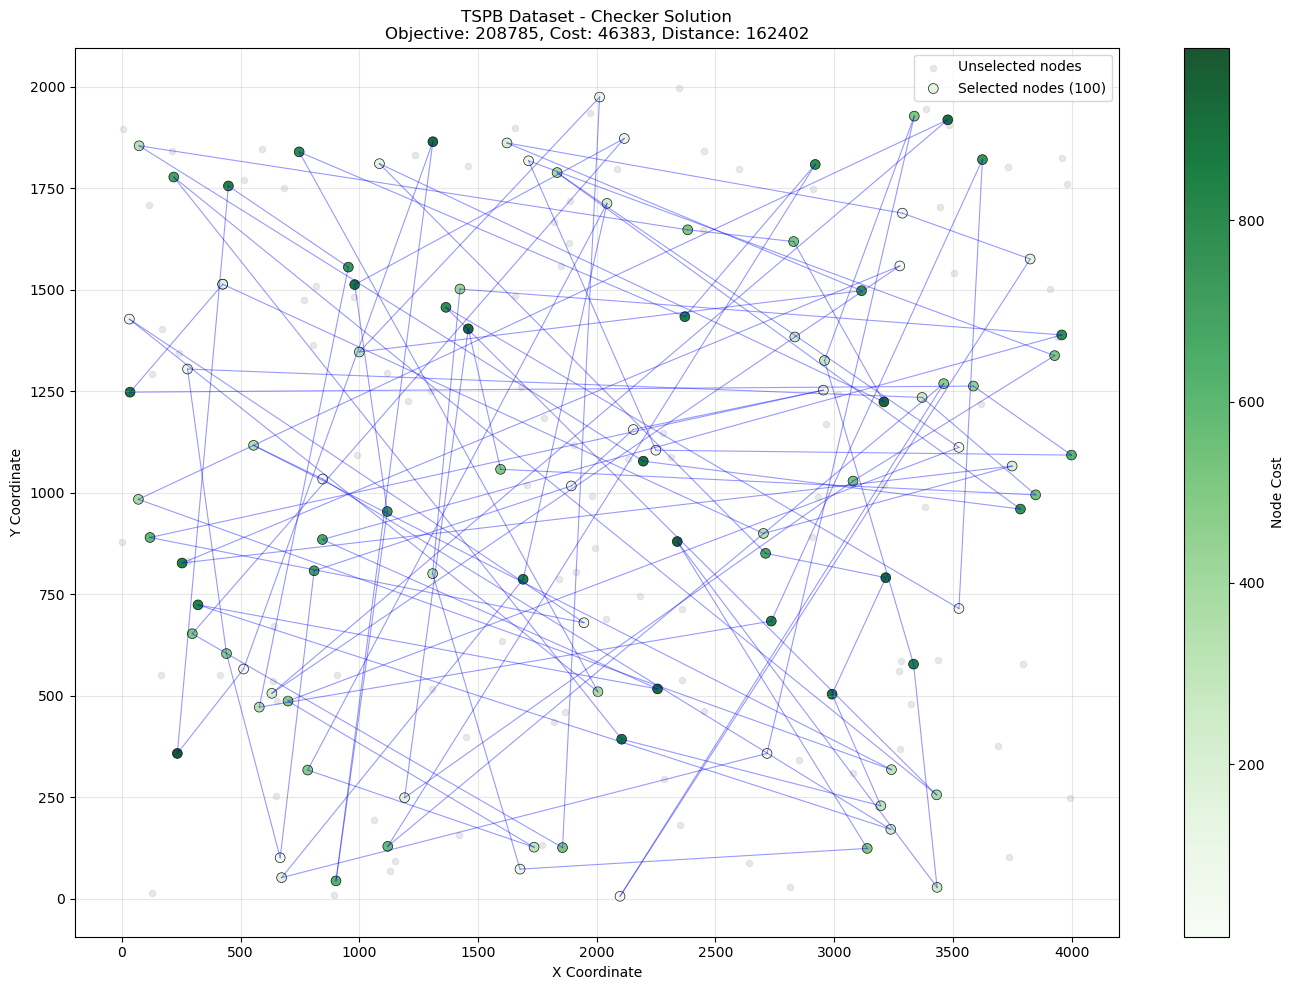

In [106]:
plot_solution('TSPB', 'Checker', checker_solution_b)